# NYPD Data Analysis

Goal of assignment is to download and inspect the Stop, Question and Frisk Data released by the New York Police Department every year.

## Some background

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a New York City Police Department practice of temporarily detaining, questioning, and at times searching civilians and suspects on the street for weapons and other contraband. This policy allowed police officers to stop, interrogate and search New York City citizens on the sole basis of “reasonable suspicion” for several years.

The stop-question-and-frisk program exploded into a national controversy during the mayoral administration of Michael Bloomberg, as the number of NYPD stops each year grew to hundreds of thousands. Most of the people stopped were black and Latino, and nearly all were innocent. 

<img src='https://www.dropbox.com/s/uo6rj86eqvnusfy/stopandfrisk.png?raw=1' width=700>

In 1999, Blacks and Latinos made up 50 percent of New York’s population, but accounted for 84 percent of the city’s stops. Those statistics changed little in the following decade. Between 2004 and 2012, the New York Police Department made 4.4 million stops under the citywide policy. More than 80 percent of those stopped were Black and Latino people. The likelihood that a stopped African-American New Yorker yielded a weapon was half that of White New Yorkers stopped, and the likelihood of finding contraband on an African American who was stopped was one-third that of White New Yorkers stopped.

Stop-and-frisk peaked in 2011, when NYPD officers reported making nearly 700,000 stops.

In 2013, a federal judge found the New York City Police Department’s “Stop-and-Frisk” policy unconstitutional and ruled that NYPD’s stop-and-frisk tactics violate the U.S Constitution’s 4th Amendment prohibition of unreasonable searches and seizures.

## Getting started

Raw data records from the NYPD Stop, Question, and Frisk database are available for download at the following [link](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page). In this assignmnet we are going to use the data for the years 2003 through 2013. 

<div class="alert alert-warning">The complete list of yearly files: <i>2003.csv</i>, <i>2004.csv</i>, <i>2005.csv</i>, <i>2006.csv</i>, <i>2007.csv</i>, <i>2008.csv</i>, <i>2009.csv</i>, <i>2010.csv</i>, <i>2011.csv</i>, <i>2012.csv</i> and <i>2013.csv</i>.</div>

In addition to the above, two additional files have also been included in the same folder:

- The file called <i>legend.xlsx</i> contains code books for all the variables listed for the different years.
- The file called <i>precincts.csv</i> contains information about how the different police precincts that appear in the police records above are classified into boroughs.


## Importing the data

Once you are done downloading the databases and checking that everything is in order, let's begin by importing the stop-and-frisk data.

<div class="alert alert-info"><b>Task 1 </b>Write the code to read the data for each of the years and concatenate them all in a single DataFrame called <i>df</i>. This DataFrame should contain the data for the years 2003 through 2013 and the whole set of columns.</div>

In [1]:
import pandas as pd

import gc
gc.enable()

y2003 = pd.read_csv('2003.csv')
y2004 = pd.read_csv('2004.csv')
y2005 = pd.read_csv('2005.csv')
y2006 = pd.read_csv('2006.csv')
y2007 = pd.read_csv('2007.csv')
y2008 = pd.read_csv('2008.csv')
y2009 = pd.read_csv('2009.csv')
y2010 = pd.read_csv('2010.csv')
y2011 = pd.read_csv('2011.csv')
y2012 = pd.read_csv('2012.csv')
y2013 = pd.read_csv('2013.csv')
legend = pd.read_excel('legend.xlsx')
precincts = pd.read_csv('precincts.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (72,73,80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (72,73,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes

In [2]:
df_temp = [y2003, y2004, y2005, y2006, y2007, y2008, y2009, y2010, y2011, y2012, y2013]  # List of your dataframes
df = pd.concat(df_temp)

The dabases contain information about a very long series of items. Here, we are only going to focus on some of them. Since our DataFrame is so big that it may already be slowing down your computer, let's remove those columns that we are not going to use.

The list shown below contains the information we are interesting in, meaning the columns that you should retain.

In [ ]:
information = ["YEAR OF STOP (CCYY)", "PRECINCT OF STOP (FROM 1 TO 123)", "WAS AN ARREST MADE ?", 
               "WAS A SUMMONS ISSUED ?", "WAS A PISTOL FOUND ON SUSPECT ?", "WAS A RIFLE FOUND ON SUSPECT ?", 
               "WAS AN ASSAULT WEAPON FOUND ON SUSPECT ?", "WAS A KNIFE OR CUTTING INSTRUMENT FOUND ON SUSPECT ?",
               "WAS A MACHINE GUN FOUND ON SUSPECT ?","WAS ANOTHER TYPE OF WEAPON FOUND ON SUSPECT", 
               "PHYSICAL FORCE USED BY OFFICER - HANDS", "PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL",
               "PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND", "PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN",
               "PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED", "PHYSICAL FORCE USED BY OFFICER - BATON",
               "PHYSICAL FORCE USED BY OFFICER - HANDCUFFS", "PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY",
               "PHYSICAL FORCE USED BY OFFICER - OTHER", "SUSPECT'S RACE"]

<div class="alert alert-info"><b>Task 2 </b>Write the code to identify the columns that contain the information above and remove all the other columns from your <i>df</i> DataFrame. Don't modify neither the name of the Dataframe nor any of the column names when doing so.</div>

In [3]:
for i in df_temp:
    i.drop(['ser_num', 'datestop', 'timestop', 'inout', 'trhsloc',
           'perobs', 'crimsusp', 'perstop', 'typeofid', 'explnstp', 'othpers',
           'arstoffn', 'sumoffen', 'compyear', 'comppct', 'offunif', 'officrid','frisked',
            'searched', 'contrabn', 'adtlrept', 'radio', 'ac_rept', 'ac_inves',
           'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr',
           'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv',
           'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim',
           'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
           'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'repcmd',
           'revcmd', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex',
           'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'haircolr', 'eyecolor',
           'build', 'othfeatr', 'addrtyp', 'crossst', 'aptnum', 'city', 'state',
           'zip', 'sector', 'beat', 'post', 'xcoord', 'ycoord'], axis=1, inplace=True)
df = pd.concat(df_temp, ignore_index=True)

## Pre-processing the data

Since there are too many different precincts for us to make sense of these data, let's add in the information about the boroughs in order to identify where the different stops took place.

<div class="alert alert-info"><b>Task 3 </b>Write the code to create a new column called <i>boro</i>. This column should contain the name of the borough that corresponds to the precinct of each entry in your <i>df</i> DataFrame. By the end of this exercise only the <i> boro</i> column should be added to <i>df</i>.</div>

In [6]:
df=pd.merge(df, precincts, how='left', left_on="pct", right_on="Precinct")
df.drop("Precinct", axis=1, inplace=True)
df.rename(columns={"Borough":"boro"}, inplace=True)

Let's further filter down these data. Some of the columns store very similar data. For example, lots of the columns refer to *PHYSICAL FORCE USED BY OFFICER*. Since we are not interested in the specific form of force used, but rather on the existence of such force, let's aggregate the information for these columns.

<div class="alert alert-info"><b>Task 4 </b>Write the code to create a new column called <i>physical_force</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>pf_hands</i>, <i>pf_wall</i>, <i>pf_grnd</i>, <i>pf_drwep</i>, <i>pf_ptwep</i>, <i>pf_baton</i>, <i>pf_hcuff</i>, <i>pf_pepsp</i> or <i>pf_other</i> is encoded as "Y", meaning that the corresponding force was used. Otherwise, the new column should take the value 0 in <b>int</b> form.</div>

In [8]:
import numpy as np

pf=np.where(df[["pf_hands","pf_wall","pf_grnd","pf_drwep","pf_ptwep","pf_hcuff","pf_pepsp","pf_other"]]=="Y", 1, 0)
physical_force=[]
for i in range(len(pf)):
    if 1 in pf[i]:
        physical_force.append(1)
    else:
        physical_force.append(0)
df["physical_force"]=physical_force

The same thing happens with a set of columns that contain the phrase WAS A - FOUND ON SUSPECT ?. Once again, we are not interested in the actual type of weapon found, but on whether a weapon was indeed found on the suspect. Hence, let's aggregate all these data into a single column.

<div class="alert alert-info"><b>Task 5 </b>Write the code to create a new column called <i>weapons</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>pistol</i>, <i>riflshot</i>, <i>asltweap</i>, <i>knifcuti</i>, <i>machgun</i> or <i>othrweap</i> is encoded as "Y", meaning that some weapon was found on the suspect. Otherwise, the new column should take the value 0 in <b>int</b> form. As before, numpy has already been imported for you in case you want to use the <i>where</i> method.</div>

In [9]:
import numpy as np
weapons=[]
weapon_presence=np.where(df[['pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap']]=="Y", 1, 0)
for i in range(len(weapon_presence)):
    if 1 in weapon_presence[i]:
        weapons.append(1)
    else:
        weapons.append(0)
df['weapons']=weapons

Finally, let's also aggregate the data about whether an arrest was made. We'll consider that an arrest took place if an arrest was actually made or is a summons was issued, or both.

<div class="alert alert-info"><b>Task 6 </b>Write the code to create a new column called <i>arrest</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>arstmade</i> or <i>sumissue</i> is encoded as "Y", meaning that some weapon was found on the suspect. Otherwise, the new column should take the value 0 in <b>int</b> form. As before, numpy has already been imported for you in case you want to use the <i>where</i> method.</div>

In [10]:
import numpy as np
arrest=[]
arrest_presence=np.where(df[['arstmade', 'sumissue']]=="Y", 1, 0)
for i in range(len(arrest_presence)):
    if 1 in arrest_presence[i]:
        arrest.append(1)
    else:
        arrest.append(0)
df["arrest"]=arrest

Finally, let's remove redundant information.

<div class="alert alert-info"><b>Task 7 </b>Write the code to remove columns <i>pct</i>, <i>pf_hands</i>, <i>pf_wall</i>, <i>pf_grnd</i>, <i>pf_drwep</i>, <i>pf_ptwep</i>, <i>pf_baton</i>, <i>pf_hcuff</i>, <i>pf_pepsp</i>, <i>pf_other</i>, <i>pistol</i>, <i>riflshot</i>, <i>asltweap</i>, <i>knifcuti</i>, <i>machgun</i>, <i>othrweap</i>, <i>arstmade</i> and <i>sumissue</i> from your DataFrame <i>df</i>.</div>

In [14]:
df.drop(["pct", "pf_hands", "pf_wall", "pf_grnd", "pf_drwep", "pf_ptwep", "pf_baton", "pf_hcuff", "pf_pepsp", 
          "pf_other", "pistol", "riflshot", "asltweap", "knifcuti", "machgun", "othrweap", "arstmade", "sumissue"], axis=1, inplace=True)

KeyError: "['pct' 'pf_hands' 'pf_wall' 'pf_grnd' 'pf_drwep' 'pf_ptwep' 'pf_baton'\n 'pf_hcuff' 'pf_pepsp' 'pf_other' 'pistol' 'riflshot' 'asltweap'\n 'knifcuti' 'machgun' 'othrweap' 'arstmade' 'sumissue'] not found in axis"

In [15]:
df.columns

Index(['year', 'race', 'boro', 'physical_force', 'weapons', 'arrest'], dtype='object')

Now that we have aggregated the data for several columns and removed all the extra ones, the final thing left to do is to pre-process the <i>race</i> column. We will begin by changing the name of the column and we will then group  the different values of this column into larger categories. 

The meaning of each of the letter codes in the <i>race</i> column is shown below, as stated in the documentation provided by NYPD:

- ' ' Not listed
- 'A' Asian/Pacific Islander
- 'B' Black
- 'I' American Indian/Alaskan native
- 'P' Black-Hispanic
- 'Q' White-Hispanic
- 'W' White
- 'X' Unknown
- 'Z' Other
- 'U' Unknown

<div class="alert alert-info"><b>Task 8 </b>Write the code to rename the <i>race</i> column as <i>ethnicity</i>. Then write the code to modify the values of your <i>ethnicity</i> column. This column should take the value 'Black' if the original record was encoded as Black or Black-Hispanic. It should take the value 'White' if the original record was encoded as White or White-Hispanic. It should take the value 'Asian' if the original record was encoded as Asian/Pacific Islander. It should take the value 'Other' if the original record was encoded as American Indian/Alaskan native, Other, Unknown or Not listed.</div>

In [16]:
df.rename(columns={"race":"ethnicity"}, inplace=True)

In [17]:
df.columns

Index(['year', 'ethnicity', 'boro', 'physical_force', 'weapons', 'arrest'], dtype='object')

In [18]:
#black
black_B=np.where(df["ethnicity"]=="B",1,0)
black_P=np.where(df["ethnicity"]=="P",1,0)
#asian
asian=np.where(df["ethnicity"]=="A",1,0)
#white
white_W=np.where(df["ethnicity"]=="W",1,0)
white_Q=np.where(df["ethnicity"]=="Q",1,0)
#other
#other_NL=np.where(df["ethnicity"]==" ",1,0)
#other_U=np.where(df["ethnicity"]=="U",1,0)
#other_Z=np.where(df["ethnicity"]=="Z",1,0)
#other_X=np.where(df["ethnicity"]=="X",1,0)
#other_I=np.where(df["ethnicity"]=="I",1,0)

#it works, it took some time but it worked
for i in range(len(df)):
    if black_B[i]==1:
        df.at[i,"ethnicity"]="Black"
    elif black_P[i]==1:
        df.at[i,"ethnicity"]="Black"
    elif asian[i]==1:
        df.at[i,"ethnicity"]="Asian"
    elif white_Q[i]==1:
        df.at[i,"ethnicity"]="White"
    elif white_W[i]==1:
        df.at[i,"ethnicity"]="White"
    else:
        df.at[i,"ethnicity"]="Other"

In [19]:
df["ethnicity"].unique()

array(['Black', 'White', 'Other', 'Asian'], dtype=object)

Saving the current dataframe to be able to restart from this point of view.

In [20]:
df.to_csv("police_stats.csv", index=False)

## Visualizing the data

Now that we have finished preparing the data let's visualize it.

The following exercises will each consist of two parts. The first part is focused on preparing the data and the second on plotting the data. Each part is evaluated separately. Meaning that you can still get the points for preparing the data even if you don't manage to plot it correctly.

<div class="alert alert-info"><b>Exercise 9 </b>Write the code to plot the total number of stops per year.<br/><ol><li>Write the code to store the x and y data for your plot in <b>list</b> form in new variables called <i>x</i> and <i>y</i>.</li>
    <li>Write the code to plot these data using a <b>line</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color to red and the plot's title to <i>Number of people stopped</i>.</li></ol></div>
    
<img src='https://www.dropbox.com/s/kzl11tmze6kjvrf/ex9.png?raw=1' width=500>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

police = pd.read_csv('police_stats.csv')

Text(0.5, 1.0, 'Number of people stopped')

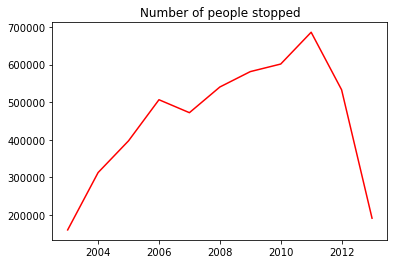

In [22]:
x=police["year"].unique()
y=(police.groupby('year').count())["ethnicity"]

fig = plt.figure()
plt.plot(x, y, color="red")
plt.title('Number of people stopped')

<div class="alert alert-info"><b>Task 10 </b>Write the code to plot the total number of stops per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black</i>, <i>y_white</i>, <i>y_asian</i> and <i>y_other</i>.</li>
    <li>Write the code to plot these data using a <b>line</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray. Set the plot's title to <i>Number of people stopped by ethnicity</i>. Make sure a legend appears to the <b>upper left</b> of your plot and that the labels in the legend correspond <b>exactly</b> to the different categories of the <i>ethnicity</i> attribute.</li></ol></div>
    
<img src='https://www.dropbox.com/s/kzl11tmze6kjvrf/ex10.png?raw=1' width=500>

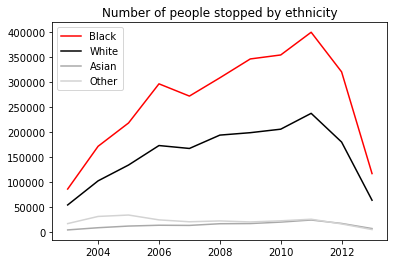

In [23]:
import matplotlib.pyplot as plt
y_black=(police.loc[police["ethnicity"]=="Black"].groupby('year').count())["ethnicity"]
y_white=(police.loc[police["ethnicity"]=="White"].groupby('year').count())["ethnicity"]
y_asian=(police.loc[police["ethnicity"]=="Asian"].groupby('year').count())["ethnicity"]
y_other=(police.loc[police["ethnicity"]=="Other"].groupby('year').count())["ethnicity"]

fig = plt.figure() #figsize=(10,6)
y=[y_black, y_white, y_asian, y_other]
colors=["red","black","darkgray","lightgray"]
legends=["Black", "White","Asian", "Other"]

for i, color, legend in zip(y,colors,legends):
    x=police["year"].unique()
    y=i
    color
    plt.plot(x, y, color=color, label=legend)
    plt.title('Number of people stopped by ethnicity')
plt.legend(loc='upper left')

For those people who where initially stopped, let's now take a look at the percentage that got arrested. 

<div class="alert alert-info"><b>Exercise 11 </b>Write the code to plot the percentage of arrests per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black_arrested</i>, <i>y_white_arrested</i>, <i>y_asian_arrested</i> and <i>y_other_arrested</i>. These values should show the percentage of arrested individuals with respect to the number of stopped people, for each listed race.</li>
    <li>Write the code to plot these data using a <b>scatter</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray. Set the plot's title to <i>Percentage of people arrested by ethnicity</i>. Make sure a legend appears to the <b>lower right</b> of your plot and that the labels in the legend correspond to the different categories of the <i>ethnicity</i> attribute.</li></ol></div>

<img src='https://www.dropbox.com/s/az9a49wd5k8ppxz/ex11.png?raw=1' width=500>

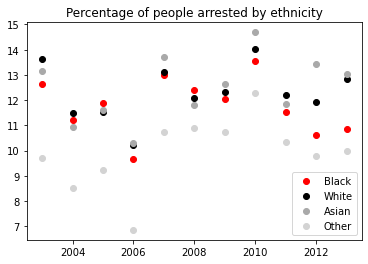

In [24]:
y_black_arrested=(100*(police.loc[police["ethnicity"]=="Black"].groupby('year').sum()["arrest"])/(police.loc[police["ethnicity"]=="Black"].groupby('year').count())["ethnicity"]).to_list()
y_white_arrested=(100*(police.loc[police["ethnicity"]=="White"].groupby('year').sum()["arrest"])/(police.loc[police["ethnicity"]=="White"].groupby('year').count())["ethnicity"]).to_list()
y_asian_arrested=(100*(police.loc[police["ethnicity"]=="Asian"].groupby('year').sum()["arrest"])/(police.loc[police["ethnicity"]=="Asian"].groupby('year').count())["ethnicity"]).to_list()
y_other_arrested=(100*(police.loc[police["ethnicity"]=="Other"].groupby('year').sum()["arrest"])/(police.loc[police["ethnicity"]=="Other"].groupby('year').count())["ethnicity"]).to_list()
y=[y_black_arrested, y_white_arrested, y_asian_arrested, y_other_arrested]
x=police["year"].unique()

fig = plt.figure()
colors=["red","black","darkgray","lightgray"]
legends=["Black", "White","Asian", "Other"]

for i, color, legend in zip(y,colors,legends):
    y=i
    color
    plt.scatter(x, y, color=color, label=legend)
    plt.title('Percentage of people arrested by ethnicity')
plt.legend(loc='lower right')

## Bonus exercise

For the bonus exercises, we will take a look at the remaining data.

We will begin by analising the percentage of individuals who were carrying a weapon when found and those for whom the police used physical force among those who where initially stopped.

<div class="alert alert-danger"><b>Bonus 1 </b>Write the code to plot the percentage of people who where found carrying a weapon and the percentage of people with whom the police used physical force per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black_weapon</i>, <i>y_white_weapon</i>, <i>y_asian_weapon</i>, <i>y_other_weapon</i>, <i>y_black_physical_force</i>, <i>y_white_physical_force</i>, <i>y_asian_physical_force</i> and <i>y_other_physical_force</i>. The first four lists should include the percentage of individuals who were found to carry a weapon with respect to the number of stopped people, for each listed ethnicity and for every year. The last four lists should include the percentage of individuals with whom the police used physical force with respect to the number of stopped people, for each listed ethnicity and for every year.</li>
    <li>Write the code to plot these data using two different <b>line</b> plots. Initialize your plot to a figure called <i>fig</i>. Use two different subplots, one for each case. They should both appear side by side. Plot the <i>weapons</i> data to the left and the <i>physical_force</i> data to the right. Set the first plot's title to <i>Percentage of people found carrying a weapon by ethnicity</i> and second plot's title to <i>Percentage of people for which the police used physical force by ethnicity</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray for both plots. Use dashed lines for the <i>weapons</i> plot and dotted lines for the <i>physical_force</i> plot. Make sure a legend appears to the <b>upper left</b> of your <i>weapons</i> plot and to the <b>upper right</b> of your <i>physical_force</i> plot and that the labels correspond to the different categories of the <i>ethnicity</i> attribute in both cases.</li></ol></div>

<img src='https://www.dropbox.com/s/4mjq080fb3pl0eb/b1.png?raw=1' width=800>

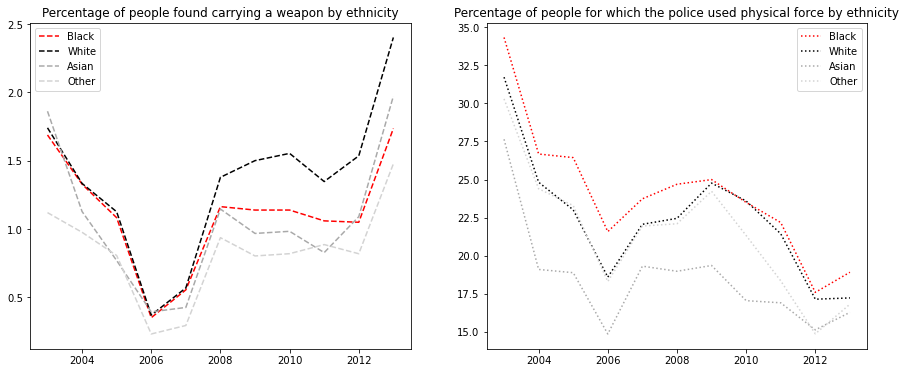

In [25]:
y_black_weapon=(100*(police.loc[police["ethnicity"]=="Black"].groupby('year').sum()["weapons"])/(police.loc[police["ethnicity"]=="Black"].groupby('year').count())["ethnicity"]).to_list()
y_white_weapon=(100*(police.loc[police["ethnicity"]=="White"].groupby('year').sum()["weapons"])/(police.loc[police["ethnicity"]=="White"].groupby('year').count())["ethnicity"]).to_list()
y_asian_weapon=(100*(police.loc[police["ethnicity"]=="Asian"].groupby('year').sum()["weapons"])/(police.loc[police["ethnicity"]=="Asian"].groupby('year').count())["ethnicity"]).to_list()
y_other_weapon=(100*(police.loc[police["ethnicity"]=="Other"].groupby('year').sum()["weapons"])/(police.loc[police["ethnicity"]=="Other"].groupby('year').count())["ethnicity"]).to_list()
y_black_physical_force=(100*(police.loc[police["ethnicity"]=="Black"].groupby('year').sum()["physical_force"])/(police.loc[police["ethnicity"]=="Black"].groupby('year').count())["ethnicity"]).to_list()
y_white_physical_force=(100*(police.loc[police["ethnicity"]=="White"].groupby('year').sum()["physical_force"])/(police.loc[police["ethnicity"]=="White"].groupby('year').count())["ethnicity"]).to_list()
y_asian_physical_force=(100*(police.loc[police["ethnicity"]=="Asian"].groupby('year').sum()["physical_force"])/(police.loc[police["ethnicity"]=="Asian"].groupby('year').count())["ethnicity"]).to_list()
y_other_physical_force=(100*(police.loc[police["ethnicity"]=="Other"].groupby('year').sum()["physical_force"])/(police.loc[police["ethnicity"]=="Other"].groupby('year').count())["ethnicity"]).to_list()

y_weapon=[y_black_weapon, y_white_weapon, y_asian_weapon, y_other_weapon]
y_physical_force=[y_black_physical_force, y_white_physical_force, y_asian_physical_force, y_other_physical_force]

x=police["year"].unique()

colors=["red","black","darkgray","lightgray"]
legends=["Black", "White","Asian", "Other"]

fig = plt.figure(figsize=(15,6)) #if I do not specify the size, there is an issue

fig1 = plt.subplot(1,2,1)
for i, color, legend in zip(y_weapon,colors,legends):
    y=i
    plt.plot(x, y, linestyle='dashed', color=color, label=legend)
plt.title('Percentage of people found carrying a weapon by ethnicity')
plt.legend(loc='upper left')

fig2 = plt.subplot(1,2,2)
for i, color, legend in zip(y_physical_force,colors,legends):
    y=i
    plt.plot(x, y, linestyle='dotted', color=color, label=legend)
plt.title('Percentage of people for which the police used physical force by ethnicity')
plt.legend(loc='upper right')

<div class="alert alert-danger"><b>Bonus 2 </b>Write the code to plot the total number of stops per borough for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_manhattan</i>, <i>y_brooklyn</i>, <i>y_bronx</i>, <i>y_queens</i> and <i>y_staten_island</i>.</li>
<li>Write the code to plot these data using a stacked bar plot. Initialize your plot to a figure called <i>fig</i>. Set the bar's color for "Manhattan" to e63946, for "Brooklyn" to f1faee, for "Bronx" to a8dadc, for "Queens" to 457b9d and for "Staten Island" to 1d3557. Set the plot's title to <i>People stopped by borough</i>. Make sure a legend appears to the <b>upper left</b> of your plot and that the labels in the legend correspond to the different categories of the <i>boro</i> attribute.</li></ol></div>

<img src='https://www.dropbox.com/s/kmsggqo58s7gnja/b2.png?raw=1' width=500>

Text(0.5, 1.0, 'People stopped by borough')

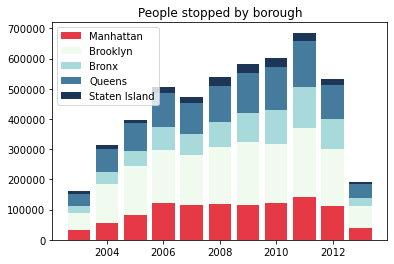

In [26]:
y_manhattan=police.loc[police["boro"]=="Manhattan"].groupby("year").count()["boro"].to_list()
y_brooklyn=police.loc[police["boro"]=="Brooklyn"].groupby("year").count()["boro"].to_list()
y_bronx=police.loc[police["boro"]=="Bronx"].groupby("year").count()["boro"].to_list()
y_queens=police.loc[police["boro"]=="Queens"].groupby("year").count()["boro"].to_list()
y_staten_island=police.loc[police["boro"]=="Staten Island"].groupby("year").count()["boro"].to_list()

x=police["year"].unique()
bottom_2=y_manhattan
bottom_3=np.add(y_manhattan, y_brooklyn).tolist()
bottom_4=np.add(bottom_3, y_bronx).tolist()
bottom_5=np.add(bottom_4, y_queens).tolist()

manhattan=plt.bar(x, y_manhattan, color='#e63946')
brooklyn=plt.bar(x, y_brooklyn, bottom=bottom_2, color='#f1faee')
bronx=plt.bar(x, y_bronx, bottom=bottom_3, color='#a8dadc')
queens=plt.bar(x, y_queens, bottom=bottom_4, color='#457b9d')
staten_island=plt.bar(x, y_staten_island, bottom=bottom_5, color='#1d3557')

plt.legend((manhattan, brooklyn, bronx, queens, staten_island),
           ('Manhattan', 'Brooklyn', 'Bronx', 'Queens','Staten Island'),
           loc='upper left')
plt.title('People stopped by borough')